In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('poster')
%matplotlib inline
sns.set_style('ticks')

In [20]:
emails = pd.read_csv('/Users/iwang/Documents/GitHub/241_data/response_data/all_emails.csv')

In [21]:
emails

,from,sector,sent,received,email,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Gary Chow,plumbing,11/30/17 11:26,12/1/17 5:57,"Gary, Are you in Santa Clara, CA? Our plumbin...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gary Chow,tutoring,11/29/17 21:56,11/29/17 23:40,"Hi Gary, Would this be for Algebra 1? Is your ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gary Chow,tutoring,11/29/17 21:59,11/29/17 21:59,"<div dir=""ltr"">Hello,¬†<div><br></div><div>Dav...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gary Chow,tutoring,11/29/17 21:52,11/30/17 9:51,Hello!! Kumon is not a tutoring service ! We a...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gary Chow,autocare,11/29/17 10:13,11/30/17 8:08,"Hi Gary, We sublet to a neighbor garage, but ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Gary Chow,autocare,11/29/17 10:19,11/30/17 7:50,$120,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Gary Chow,autocare,11/29/17 10:11,12/1/17 16:11,"Good Morning Gary, A Four Wheel Alignment on a...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gary Chow,babysitting,11/30/17 9:43,12/1/17 9:34,"Hi Gary, I believe you are looking for a dayc...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Gary Chow,babysitting,11/30/17 1:09,11/30/17 13:20,"Hi Gary, Could you clarify what you are looki...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Gary Chow,autocare,11/29/17 22:19,11/29/17 22:26,"Hi Gary, I don‚Äôt do alignments, my business...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
emails['received'] = pd.to_datetime(emails['received'])
emails['sent'] = pd.to_datetime(emails['sent'])

In [23]:
emails['sent'].replace('None', np.nan, inplace=True)
emails['received'].replace('None', np.nan, inplace=True)

In [11]:
emails.fillna(value=np.nan, inplace=True)

In [26]:
emails['received'].describe()

count                    1320
unique                   1007
top       2017-11-29 22:23:00
freq                        6
first     2017-01-12 00:00:00
last      2017-12-11 18:35:00
Name: received, dtype: object

In [27]:
emails["time_dff"] = emails['received']- emails['sent']

In [28]:
emails['time_dff'].describe()

count                       1320
mean      0 days 16:52:28.318181
std      10 days 04:38:37.039221
min          -323 days +02:08:00
25%              0 days 10:45:45
50%              0 days 19:37:00
75%              1 days 02:38:30
max             12 days 08:46:00
Name: time_dff, dtype: object

In [29]:
emails['time_dff']

0        0 days 18:31:00
1        0 days 01:44:00
2        0 days 00:00:00
3        0 days 11:59:00
4        0 days 21:55:00
5        0 days 21:31:00
6        2 days 06:00:00
7        0 days 23:51:00
8        0 days 12:11:00
9        0 days 00:07:00
10       0 days 12:17:00
11       4 days 18:32:00
12       0 days 12:31:00
13       1 days 00:48:00
14     -2 days +14:32:00
15       0 days 22:33:00
16       2 days 02:41:00
17       0 days 01:38:00
18       0 days 14:51:00
19       0 days 01:47:00
20       0 days 21:18:00
21       0 days 15:43:00
22       0 days 21:38:00
23       0 days 00:04:00
24       0 days 11:14:00
25       1 days 06:31:00
26       0 days 21:39:00
27       0 days 19:23:00
28       4 days 09:23:00
29       0 days 17:06:00
              ...       
1291     0 days 12:12:00
1292     0 days 12:27:00
1293     0 days 16:08:00
1294     0 days 21:56:00
1295     5 days 02:04:00
1296     0 days 09:08:00
1297     1 days 04:52:00
1298     5 days 05:41:00
1299     1 days 00:02:00


In [34]:
emails['hours'] = emails['time_dff'].astype('timedelta64[h]')

In [35]:
emails['hours']

0        18.0
1         1.0
2         0.0
3        11.0
4        21.0
5        21.0
6        54.0
7        23.0
8        12.0
9         0.0
10       12.0
11      114.0
12       12.0
13       24.0
14      -34.0
15       22.0
16       50.0
17        1.0
18       14.0
19        1.0
20       21.0
21       15.0
22       21.0
23        0.0
24       11.0
25       30.0
26       21.0
27       19.0
28      105.0
29       17.0
        ...  
1291     12.0
1292     12.0
1293     16.0
1294     21.0
1295    122.0
1296      9.0
1297     28.0
1298    125.0
1299     24.0
1300     25.0
1301     14.0
1302     22.0
1303     26.0
1304     10.0
1305     24.0
1306      9.0
1307     13.0
1308     28.0
1309      3.0
1310     12.0
1311    154.0
1312     94.0
1313     19.0
1314     10.0
1315     21.0
1316      7.0
1317     23.0
1318      6.0
1319     62.0
1320     23.0
Name: hours, Length: 1321, dtype: float64

In [37]:
emails['hours'].describe()

count    1320.000000
mean       16.412121
std       244.636293
min     -7750.000000
25%        10.000000
50%        19.000000
75%        26.000000
max       296.000000
Name: hours, dtype: float64

In [38]:
##convert negative times to 0 = these are probably not correct as we can't receive an email before we send one
emails[emails['hours'] < 0] = 0

In [40]:
emails['hours'].describe()

count    1320.000000
mean       25.780303
std        33.583434
min         0.000000
25%        10.000000
50%        19.000000
75%        26.000000
max       296.000000
Name: hours, dtype: float64

(array([ 140.,  259.,  213.,  293.,  165.,   80.,   22.,   16.,   27.,
          10.,    7.,    1.,    3.,    6.,    6.,    4.,    8.,    4.,
           3.,    6.,    9.,    6.,    1.,    1.,    3.,    5.,    1.,
           3.,    3.,    2.,    0.,    2.,    1.,    2.,    0.,    2.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    1.,    2.]),
 array([   0.  ,    5.92,   11.84,   17.76,   23.68,   29.6 ,   35.52,
          41.44,   47.36,   53.28,   59.2 ,   65.12,   71.04,   76.96,
          82.88,   88.8 ,   94.72,  100.64,  106.56,  112.48,  118.4 ,
         124.32,  130.24,  136.16,  142.08,  148.  ,  153.92,  159.84,
         165.76,  171.68,  177.6 ,  183.52,  189.44,  195.36,  201.28,
         207.2 ,  213.12,  219.04,  224.96,  230.88,  236.8 ,  242.72,
         248.64,  254.56,  260.48,  266.4 ,  272.32,  278.24,  284.16,
         290.08,  296.  ]),
 <a list of 50 Patch objects>)

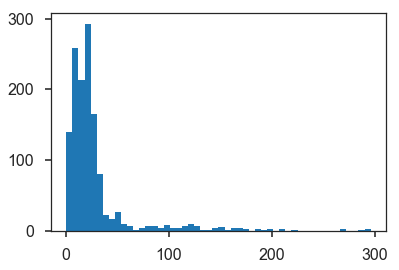

In [55]:
plt.hist(emails['hours'].dropna(), 50)


In [59]:
##let's split it into different people
gary = emails[emails['from'] == 'Gary Chow']
james = emails[emails['from'] == 'James Hoyt']
sarah = emails[emails['from'] == 'Sarah Anderson']
maria = emails[emails['from'] == 'Maria Rodriguez']
juan = emails[emails['from'] == 'Juan Sanchez']
michelle = emails[emails['from'] == 'Michelle Chen']
tyrone = emails[emails['from'] == 'Tyrone James']
latoya = emails[emails['from'] == 'LaToya Johnson']

(array([ 27.,  53.,  46.,  26.,   8.,   3.,   7.,   4.,   2.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,    5.34,   10.68,   16.02,   21.36,   26.7 ,   32.04,
          37.38,   42.72,   48.06,   53.4 ,   58.74,   64.08,   69.42,
          74.76,   80.1 ,   85.44,   90.78,   96.12,  101.46,  106.8 ,
         112.14,  117.48,  122.82,  128.16,  133.5 ,  138.84,  144.18,
         149.52,  154.86,  160.2 ,  165.54,  170.88,  176.22,  181.56,
         186.9 ,  192.24,  197.58,  202.92,  208.26,  213.6 ,  218.94,
         224.28,  229.62,  234.96,  240.3 ,  245.64,  250.98,  256.32,
         261.66,  267.  ]),
 <a list of 50 Patch objects>)

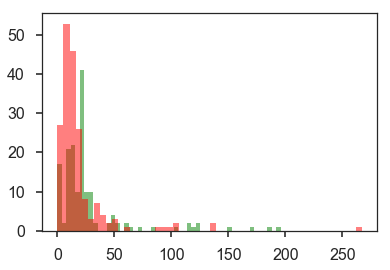

In [62]:
#asian gender difference
plt.hist(gary['hours'].dropna(), 50, alpha=.5, color='green')
plt.hist(michelle['hours'].dropna(), 50, alpha=.5, color='red')

(array([ 17.,   7.,  41.,  18.,  25.,  26.,  19.,   6.,   2.,   0.,   5.,
          7.,   1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([   0.  ,    4.42,    8.84,   13.26,   17.68,   22.1 ,   26.52,
          30.94,   35.36,   39.78,   44.2 ,   48.62,   53.04,   57.46,
          61.88,   66.3 ,   70.72,   75.14,   79.56,   83.98,   88.4 ,
          92.82,   97.24,  101.66,  106.08,  110.5 ,  114.92,  119.34,
         123.76,  128.18,  132.6 ,  137.02,  141.44,  145.86,  150.28,
         154.7 ,  159.12,  163.54,  167.96,  172.38,  176.8 ,  181.22,
         185.64,  190.06,  194.48,  198.9 ,  203.32,  207.74,  212.16,
         216.58,  221.  ]),
 <a list of 50 Patch objects>)

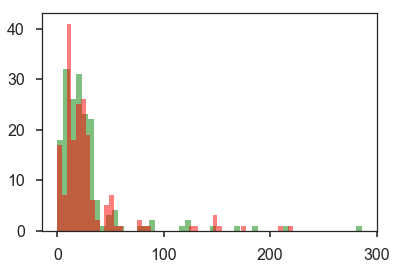

In [63]:
#white gender difference
plt.hist(james['hours'].dropna(), 50, alpha=.5, color='green')
plt.hist(sarah['hours'].dropna(), 50, alpha=.5, color='red')

(array([ 12.,   6.,  29.,  20.,   4.,  48.,  15.,   7.,   7.,   2.,   2.,
          1.,   1.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([   0.  ,    3.92,    7.84,   11.76,   15.68,   19.6 ,   23.52,
          27.44,   31.36,   35.28,   39.2 ,   43.12,   47.04,   50.96,
          54.88,   58.8 ,   62.72,   66.64,   70.56,   74.48,   78.4 ,
          82.32,   86.24,   90.16,   94.08,   98.  ,  101.92,  105.84,
         109.76,  113.68,  117.6 ,  121.52,  125.44,  129.36,  133.28,
         137.2 ,  141.12,  145.04,  148.96,  152.88,  156.8 ,  160.72,
         164.64,  168.56,  172.48,  176.4 ,  180.32,  184.24,  188.16,
         192.08,  196.  ]),
 <a list of 50 Patch objects>)

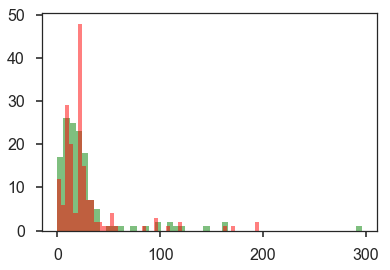

In [66]:
#hispanic gender difference
plt.hist(juan['hours'].dropna(), 50, alpha=.5, color='green')
plt.hist(maria['hours'].dropna(), 50, alpha=.5, color='red')

(array([ 11.,  19.,  19.,  44.,  22.,  10.,   2.,   4.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,    5.92,   11.84,   17.76,   23.68,   29.6 ,   35.52,
          41.44,   47.36,   53.28,   59.2 ,   65.12,   71.04,   76.96,
          82.88,   88.8 ,   94.72,  100.64,  106.56,  112.48,  118.4 ,
         124.32,  130.24,  136.16,  142.08,  148.  ,  153.92,  159.84,
         165.76,  171.68,  177.6 ,  183.52,  189.44,  195.36,  201.28,
         207.2 ,  213.12,  219.04,  224.96,  230.88,  236.8 ,  242.72,
         248.64,  254.56,  260.48,  266.4 ,  272.32,  278.24,  284.16,
         290.08,  296.  ]),
 <a list of 50 Patch objects>)

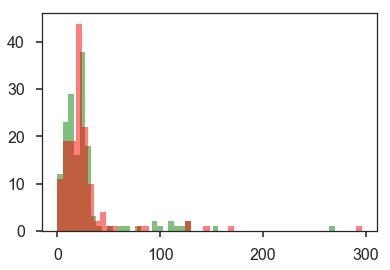

In [65]:
#black gender difference
plt.hist(tyrone['hours'].dropna(), 50, alpha=.5, color='green')
plt.hist(latoya['hours'].dropna(), 50, alpha=.5, color='red')

(array([ 11.,  19.,  19.,  44.,  22.,  10.,   2.,   4.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,    5.92,   11.84,   17.76,   23.68,   29.6 ,   35.52,
          41.44,   47.36,   53.28,   59.2 ,   65.12,   71.04,   76.96,
          82.88,   88.8 ,   94.72,  100.64,  106.56,  112.48,  118.4 ,
         124.32,  130.24,  136.16,  142.08,  148.  ,  153.92,  159.84,
         165.76,  171.68,  177.6 ,  183.52,  189.44,  195.36,  201.28,
         207.2 ,  213.12,  219.04,  224.96,  230.88,  236.8 ,  242.72,
         248.64,  254.56,  260.48,  266.4 ,  272.32,  278.24,  284.16,
         290.08,  296.  ]),
 <a list of 50 Patch objects>)

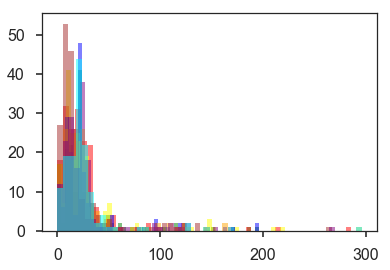

In [91]:
plt.hist(gary['hours'].dropna(), 50, alpha=.5, color='green')
plt.hist(james['hours'].dropna(), 50, alpha=.5, color='red')
plt.hist(sarah['hours'].dropna(), 50, alpha=.5, color='yellow')
plt.hist(maria['hours'].dropna(), 50, alpha=.5, color='blue')
plt.hist(juan['hours'].dropna(), 50, alpha=.5, color='orange')
plt.hist(michelle['hours'].dropna(), 50, alpha=.5, color='brown')
plt.hist(tyrone['hours'].dropna(), 50, alpha=.5, color='purple')
plt.hist(latoya['hours'].dropna(), 50, alpha=.5, color='cyan')


In [68]:
print gary['hours'].mean()
print james['hours'].mean()
print sarah['hours'].mean()
print maria['hours'].mean()
print juan['hours'].mean() 
print michelle['hours'].mean()
print tyrone['hours'].mean()
print latoya['hours'].mean()

27.417721519
27.5754189944
27.7872340426
26.2
27.3823529412
18.8882978723
26.735483871
26.1785714286


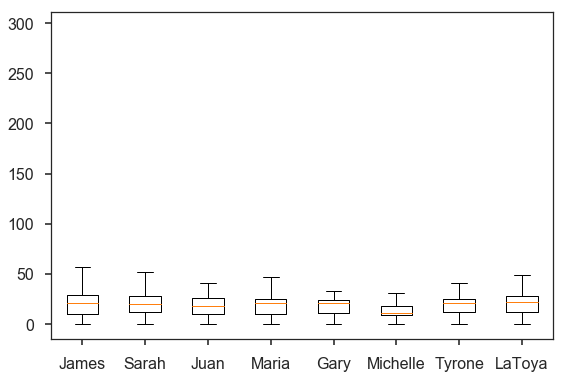

In [78]:
data_to_plot = [james['hours'].dropna(), sarah['hours'].dropna(), juan['hours'].dropna(), maria['hours'].dropna(), gary['hours'].dropna(),michelle['hours'].dropna(),tyrone['hours'].dropna(),latoya['hours'].dropna()]
labels = ['James', 'Sarah', 'Juan', 'Maria', 'Gary', 'Michelle', 'Tyrone', 'LaToya']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, labels=labels)

In [87]:
#break it up by sectors
autocare = emails[emails['sector'] == 'autocare']
tutoring = emails[emails['sector'] == 'tutoring']
gardening = emails[emails['sector'] == 'gardening']
babysitting = emails[emails['sector'] == 'babysitting']
plumbing = emails[emails['sector'] == 'plumbing']
cleaning = emails[emails['sector'] == 'cleaning']


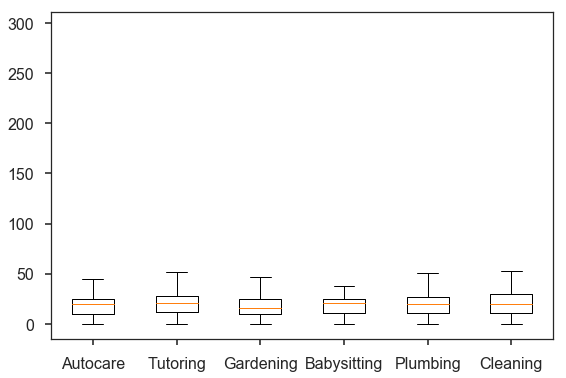

In [88]:
data_to_plot = [autocare['hours'].dropna(), tutoring['hours'].dropna(), gardening['hours'].dropna(), babysitting['hours'].dropna(), plumbing['hours'].dropna(),cleaning['hours'].dropna()]
labels = ['Autocare', 'Tutoring', 'Gardening', 'Babysitting', 'Plumbing', 'Cleaning']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, labels=labels)

In [82]:
#break it up by gender
female = emails[(emails['from'] == 'Sarah Anderson') | (emails['from'] == 'Maria Rodriguez') | (emails['from'] == 'Michelle Chen') | (emails['from'] == 'LaToya Johnson')]
male = emails[(emails['from'] == 'Gary Chow') | (emails['from'] == 'Juan Sanchez') | (emails['from'] == 'James Hoyt') | (emails['from'] == 'Tyrone James')]

In [84]:
female['hours'].describe()


count    686.000000
mean      24.626822
std       32.011277
min        0.000000
25%       10.000000
50%       18.000000
75%       26.000000
max      296.000000
Name: hours, dtype: float64

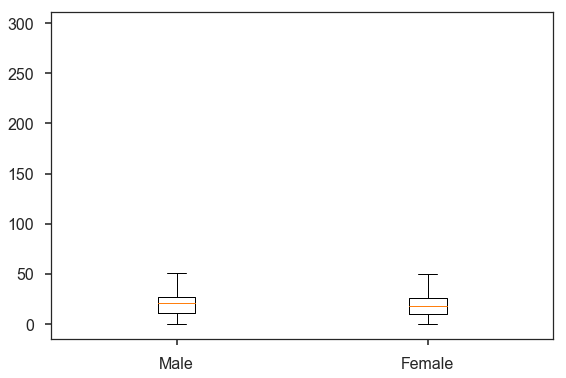

In [86]:
data_to_plot = [male['hours'].dropna(), female['hours'].dropna()]
labels = ['Male', 'Female']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, labels=labels)

In [89]:
emails.to_csv('emails_with_times.csv', sep=',')

In [90]:
pwd

u'/Users/iwang/Documents/GitHub/241_data'